In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados_csv = 'https://raw.githubusercontent.com/themachineheadbr/study_group_ds_ai/main/healthcare-dataset-stroke-data.csv'

dados=pd.read_csv(dados_csv)
dados

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [36]:
dados.dropna(inplace=True)

In [10]:
dados["gender"].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
dados["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
dados = dados[dados.gender != "Other"]
dados["gender"].unique()

array(['Male', 'Female'], dtype=object)

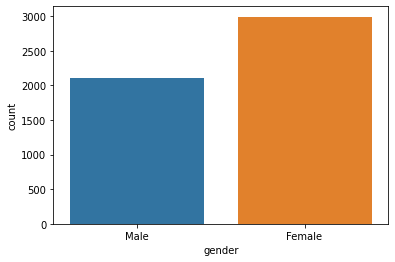

In [17]:
sns.countplot(x = 'gender', data=dados)


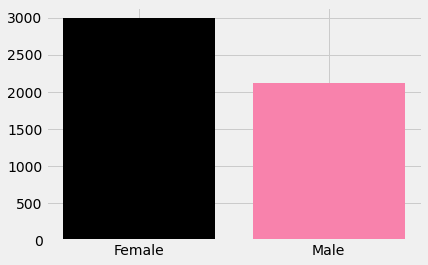

In [31]:

data = dados['gender'].value_counts().to_dict()
names = list(data.keys())
values = list(data.values())


plt.bar(names, values, color=['#000000', '#F882AC'])
plt.show()


In [37]:
dados_stroke = dados[dados.stroke != 0]
dados_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


{'boxes': [<matplotlib.lines.Line2D at 0x7f08feac8390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f08feace3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f08feacec50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f08feb14450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f08feac8910>,
  <matplotlib.lines.Line2D at 0x7f08feac8e50>]}

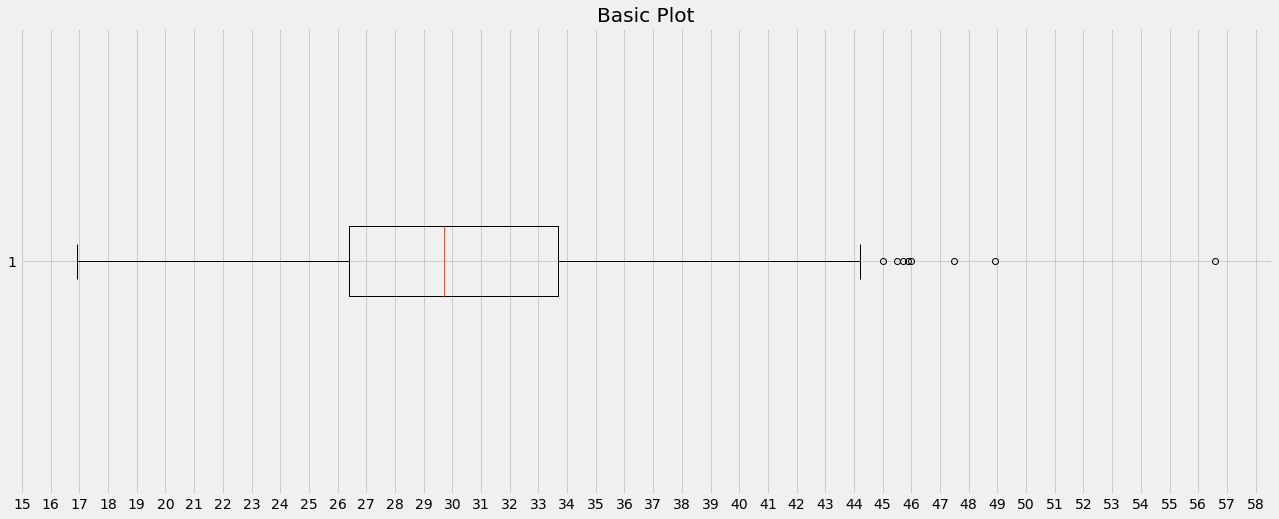

In [54]:
# import numpy as np

# spread = np.random.rand(50) * 100
# center = np.ones(25) * 50
# flier_high = np.random.rand(10) * 100 + 100
# flier_low = np.random.rand(10) * -100
# data = np.concatenate((spread, center, flier_high, flier_low))

fig1, ax1 = plt.subplots(figsize = (20,8))
ax1.set_title('Basic Plot')

ax1.set_xticks(range(1,100))
ax1.boxplot(dados_stroke['bmi'], vert=False)


#sns.boxplot(x = dados_stroke.bmi)


In [43]:
dados_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.0
mean,37546.038278,67.712919,0.287081,0.191388,134.571388,30.471292,1.0
std,22078.273383,12.402848,0.453486,0.394338,62.462047,6.329452,0.0
min,210.000000,14.000000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17308.000000,58.000000,0.000000,0.000000,80.430000,26.400000,1.0
50%,36857.000000,70.000000,0.000000,0.000000,106.580000,29.700000,1.0
75%,56939.000000,78.000000,1.000000,0.000000,196.920000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [68]:
#Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
#Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

lim_inf = 26.4 - 1.5*(33.7 - 26.40)
int(lim_inf)

15

In [61]:
lim_sup = 33.7 + 1.5*(33.7 - 26.4)
lim_sup

44.650000000000006

In [83]:
add=[0, 'Female', 0, 0, 0, 'Yes', 'Private',	'Rural' , 0, 13.2, 'Unknown', 0]
add_row = pd.DataFrame(columns=add)

In [74]:
dados_stroke.shape

(209, 12)